In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_excel(r"C:\Users\DELL\Downloads\census.xlsx", na_values=["", " ?"])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,no
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,yes
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,no
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,no


We have to predict whether the person makes over 50k per year or not, based on the other attributes in the datatset, so this problem is a classification problem.

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income', 'makes over $50K a year'],
      dtype='object')

In [9]:
df.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,no
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,no
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,no
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,yes
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,yes
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,yes


In [10]:
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
5048,32,Private,473133,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,yes


In [11]:
df.tail(14)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K,no
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,no
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K,no
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K,no
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,no
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,no
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,no
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,yes
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,no
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,no


# EXPLORATORY DATA ANALYSIS 

In [12]:
df.shape

(32560, 16)

In [13]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income', 'makes over $50K a year'],
      dtype='object')

In [16]:
df.isnull().sum()

Age                          0
Workclass                 1836
Fnlwgt                       0
Education                    0
Education_num                0
Marital_status               0
Occupation                1843
Relationship                 0
Race                         0
Sex                          0
Capital_gain                 0
Capital_loss                 0
Hours_per_week               0
Native_country             583
Income                       0
makes over $50K a year       0
dtype: int64

In [17]:
df.dtypes

Age                        int64
Workclass                 object
Fnlwgt                     int64
Education                 object
Education_num              int64
Marital_status            object
Occupation                object
Relationship              object
Race                      object
Sex                       object
Capital_gain               int64
Capital_loss               int64
Hours_per_week             int64
Native_country            object
Income                    object
makes over $50K a year    object
dtype: object

In [18]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include='float64').columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

missing_values = df.isnull().sum()
print("Remaining missing values:\n", missing_values)


Remaining missing values:
 Age                       0
Workclass                 0
Fnlwgt                    0
Education                 0
Education_num             0
Marital_status            0
Occupation                0
Relationship              0
Race                      0
Sex                       0
Capital_gain              0
Capital_loss              0
Hours_per_week            0
Native_country            0
Income                    0
makes over $50K a year    0
dtype: int64


In [19]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,no
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,yes
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,no
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,no


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     32560 non-null  int64 
 1   Workclass               32560 non-null  object
 2   Fnlwgt                  32560 non-null  int64 
 3   Education               32560 non-null  object
 4   Education_num           32560 non-null  int64 
 5   Marital_status          32560 non-null  object
 6   Occupation              32560 non-null  object
 7   Relationship            32560 non-null  object
 8   Race                    32560 non-null  object
 9   Sex                     32560 non-null  object
 10  Capital_gain            32560 non-null  int64 
 11  Capital_loss            32560 non-null  int64 
 12  Hours_per_week          32560 non-null  int64 
 13  Native_country          32560 non-null  object
 14  Income                  32560 non-null  object
 15  ma

In [21]:
for i in df.columns:
    print(df[i].unique())
    print('\n')
    print(df[i].nunique())
    print('\n')

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


73


[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


8


[ 83311 215646 234721 ...  34066  84661 257302]


21647


[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


16


[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


16


[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


7


[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Prot

<Axes: xlabel='Capital_gain', ylabel='Age'>

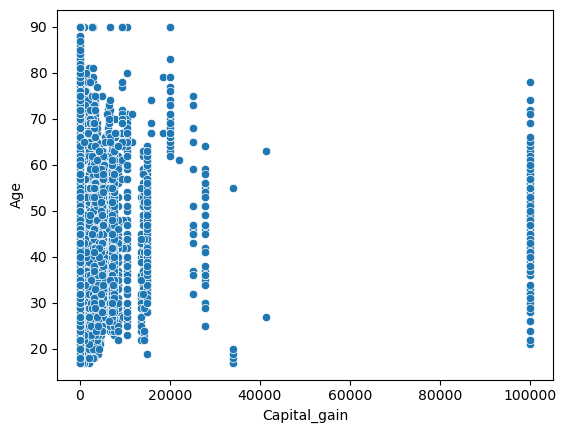

In [24]:
sns.scatterplot(y="Age",x="Capital_gain",data=df)

Capital gain of 0-20,000 is falling under most of the age groups.

<Axes: xlabel='Education_num', ylabel='Age'>

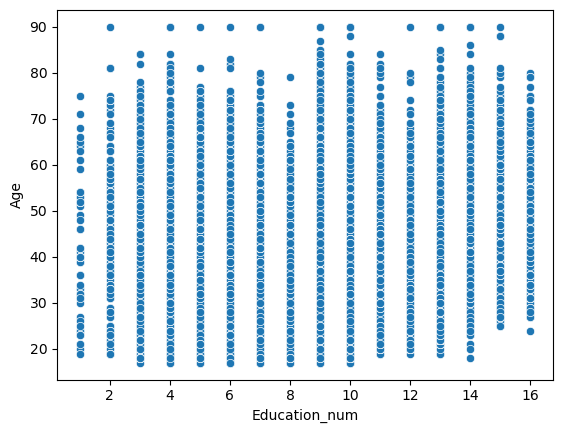

In [25]:
sns.scatterplot(y="Age",x="Education_num",data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

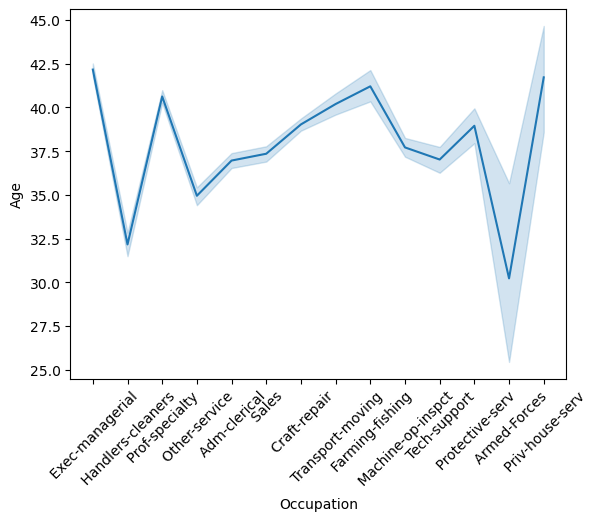

In [27]:
sns.lineplot(y="Age",x="Occupation",data=df)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

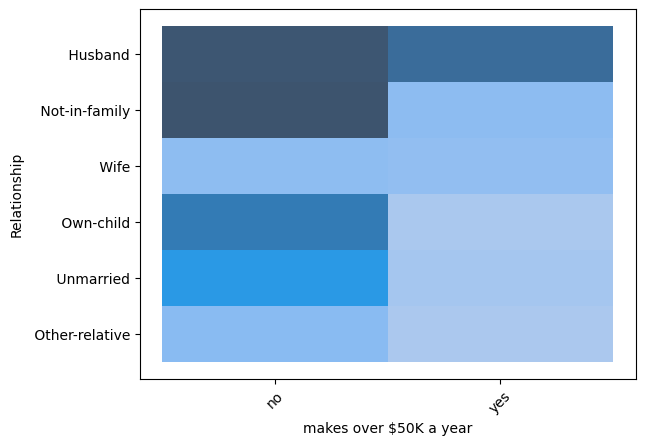

In [35]:
sns.histplot(y="Relationship",x="makes over $50K a year",data=df)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

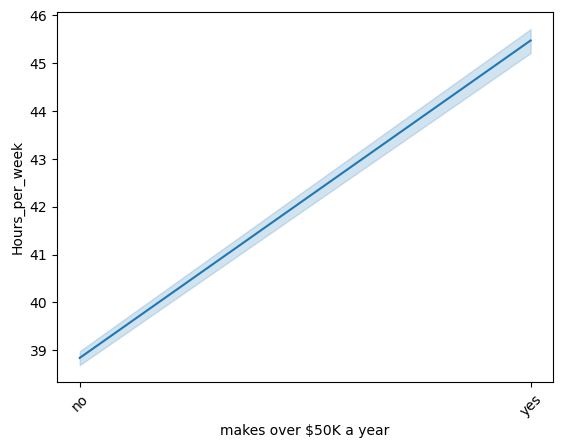

In [36]:
sns.lineplot(y="Hours_per_week",x="makes over $50K a year",data=df)
plt.xticks(rotation=45)

The more hours they work, the more money they make

([0, 1, 2, 3, 4],
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

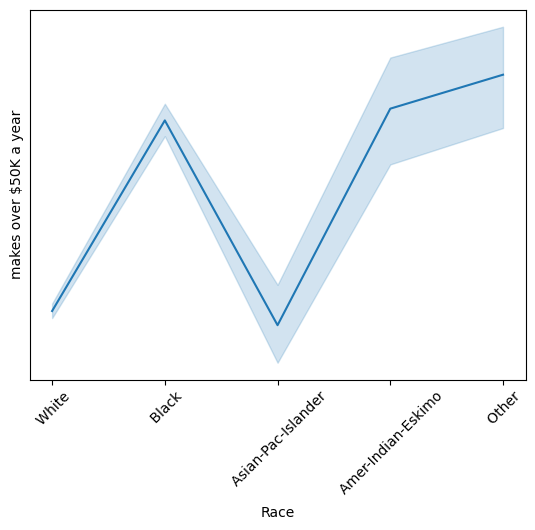

In [41]:
sns.lineplot(x="Race",y="makes over $50K a year",data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

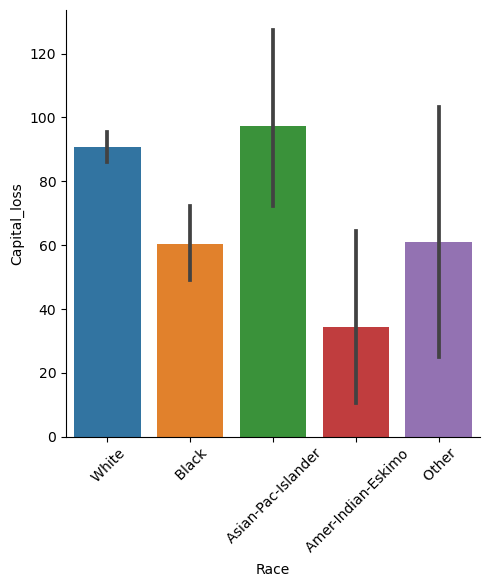

In [49]:
sns.catplot(x="Race",y="Capital_loss",data=df, kind='bar')
plt.xticks(rotation=45)

Asian-Pac-Islander has the hihest capital loss and Amer-Indian-Eskimo has the lowest.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

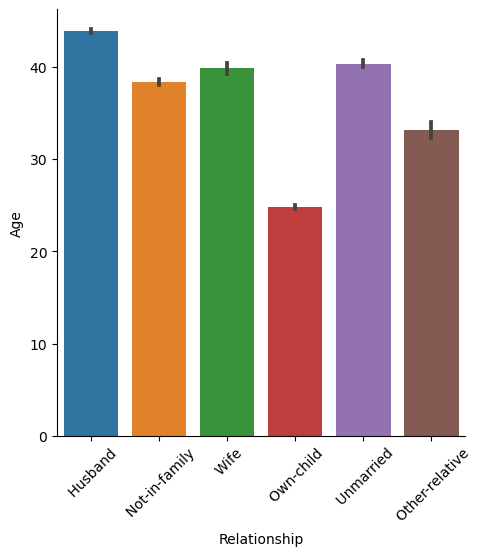

In [51]:
sns.catplot(x="Relationship",y="Age",data=df, kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

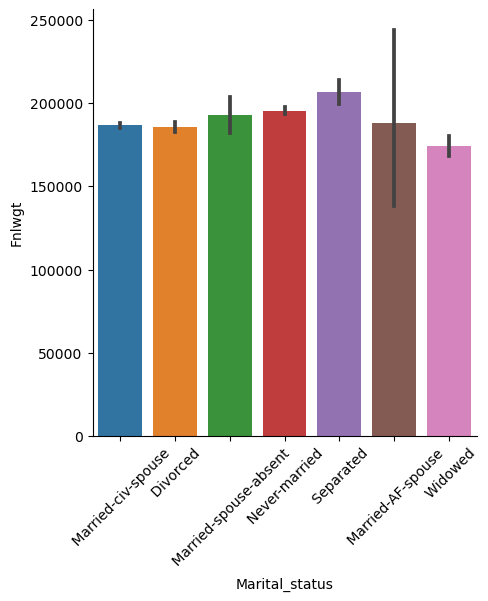

In [63]:
sns.catplot(x="Marital_status",y="Fnlwgt",data=df, kind="bar")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

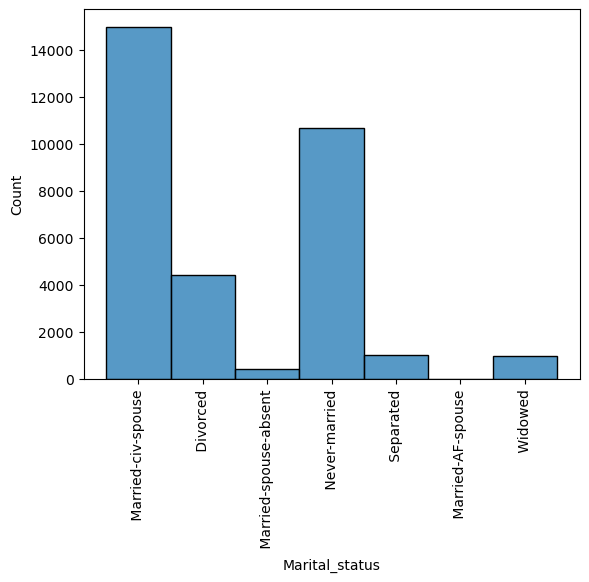

In [66]:
sns.histplot(x="Marital_status",data=df,bins=20)
plt.xticks(rotation=90)

Married-civ-spouse has the highest count

([0, 1], [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

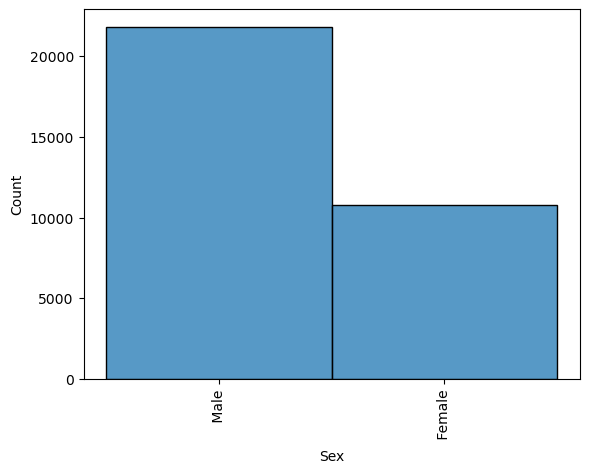

In [68]:
sns.histplot(x="Sex",data=df,bins=20)
plt.xticks(rotation=90)

no     24720
yes     7840
Name: makes over $50K a year, dtype: int64

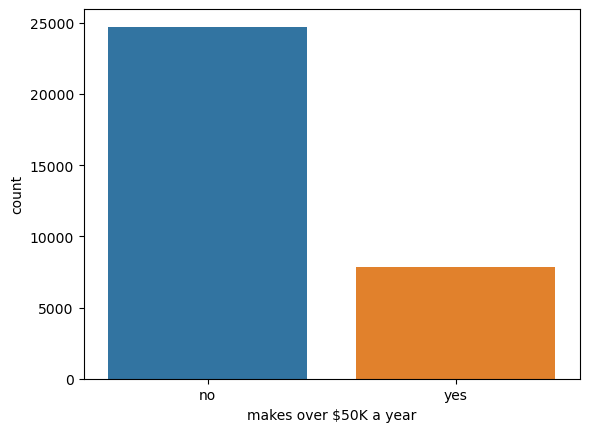

In [69]:
sns.countplot(x="makes over $50K a year", data = df)
df['makes over $50K a year'].value_counts()

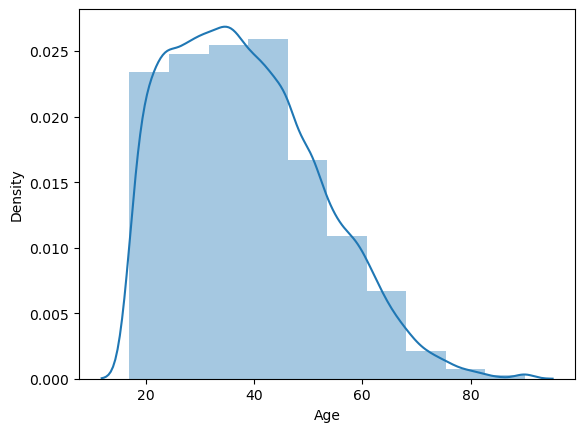

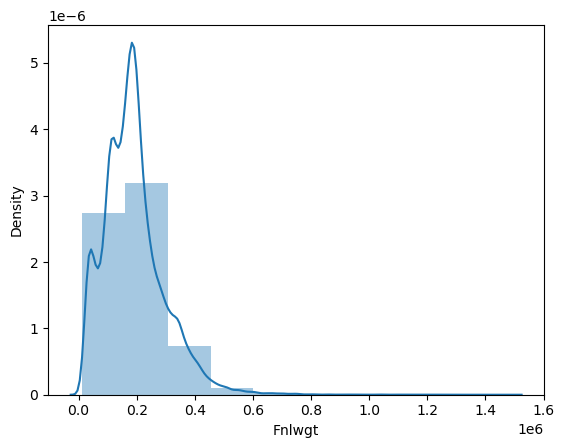

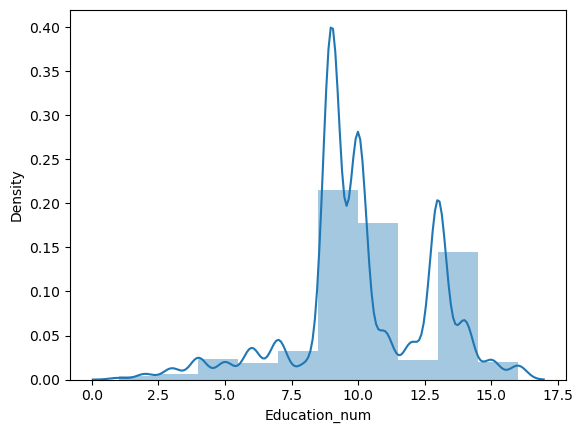

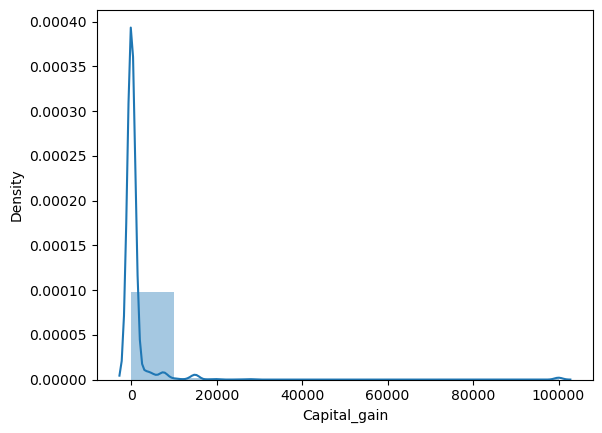

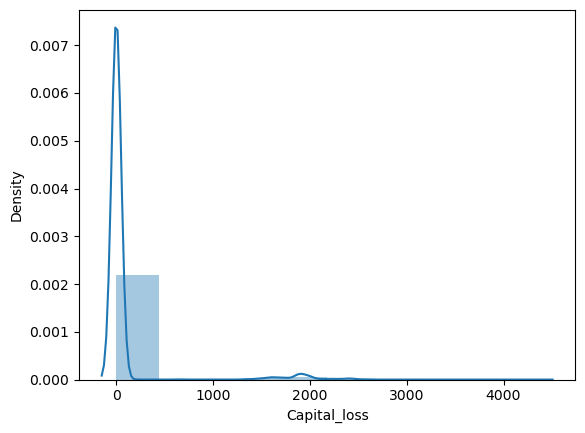

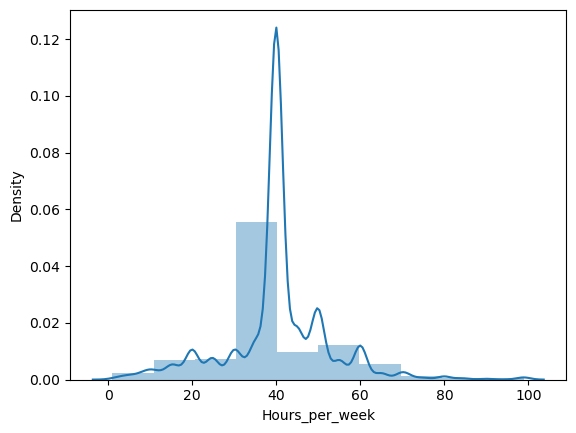

In [70]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        sns.distplot(df[i], bins=10) 
        plt.show()  
    print('\n')

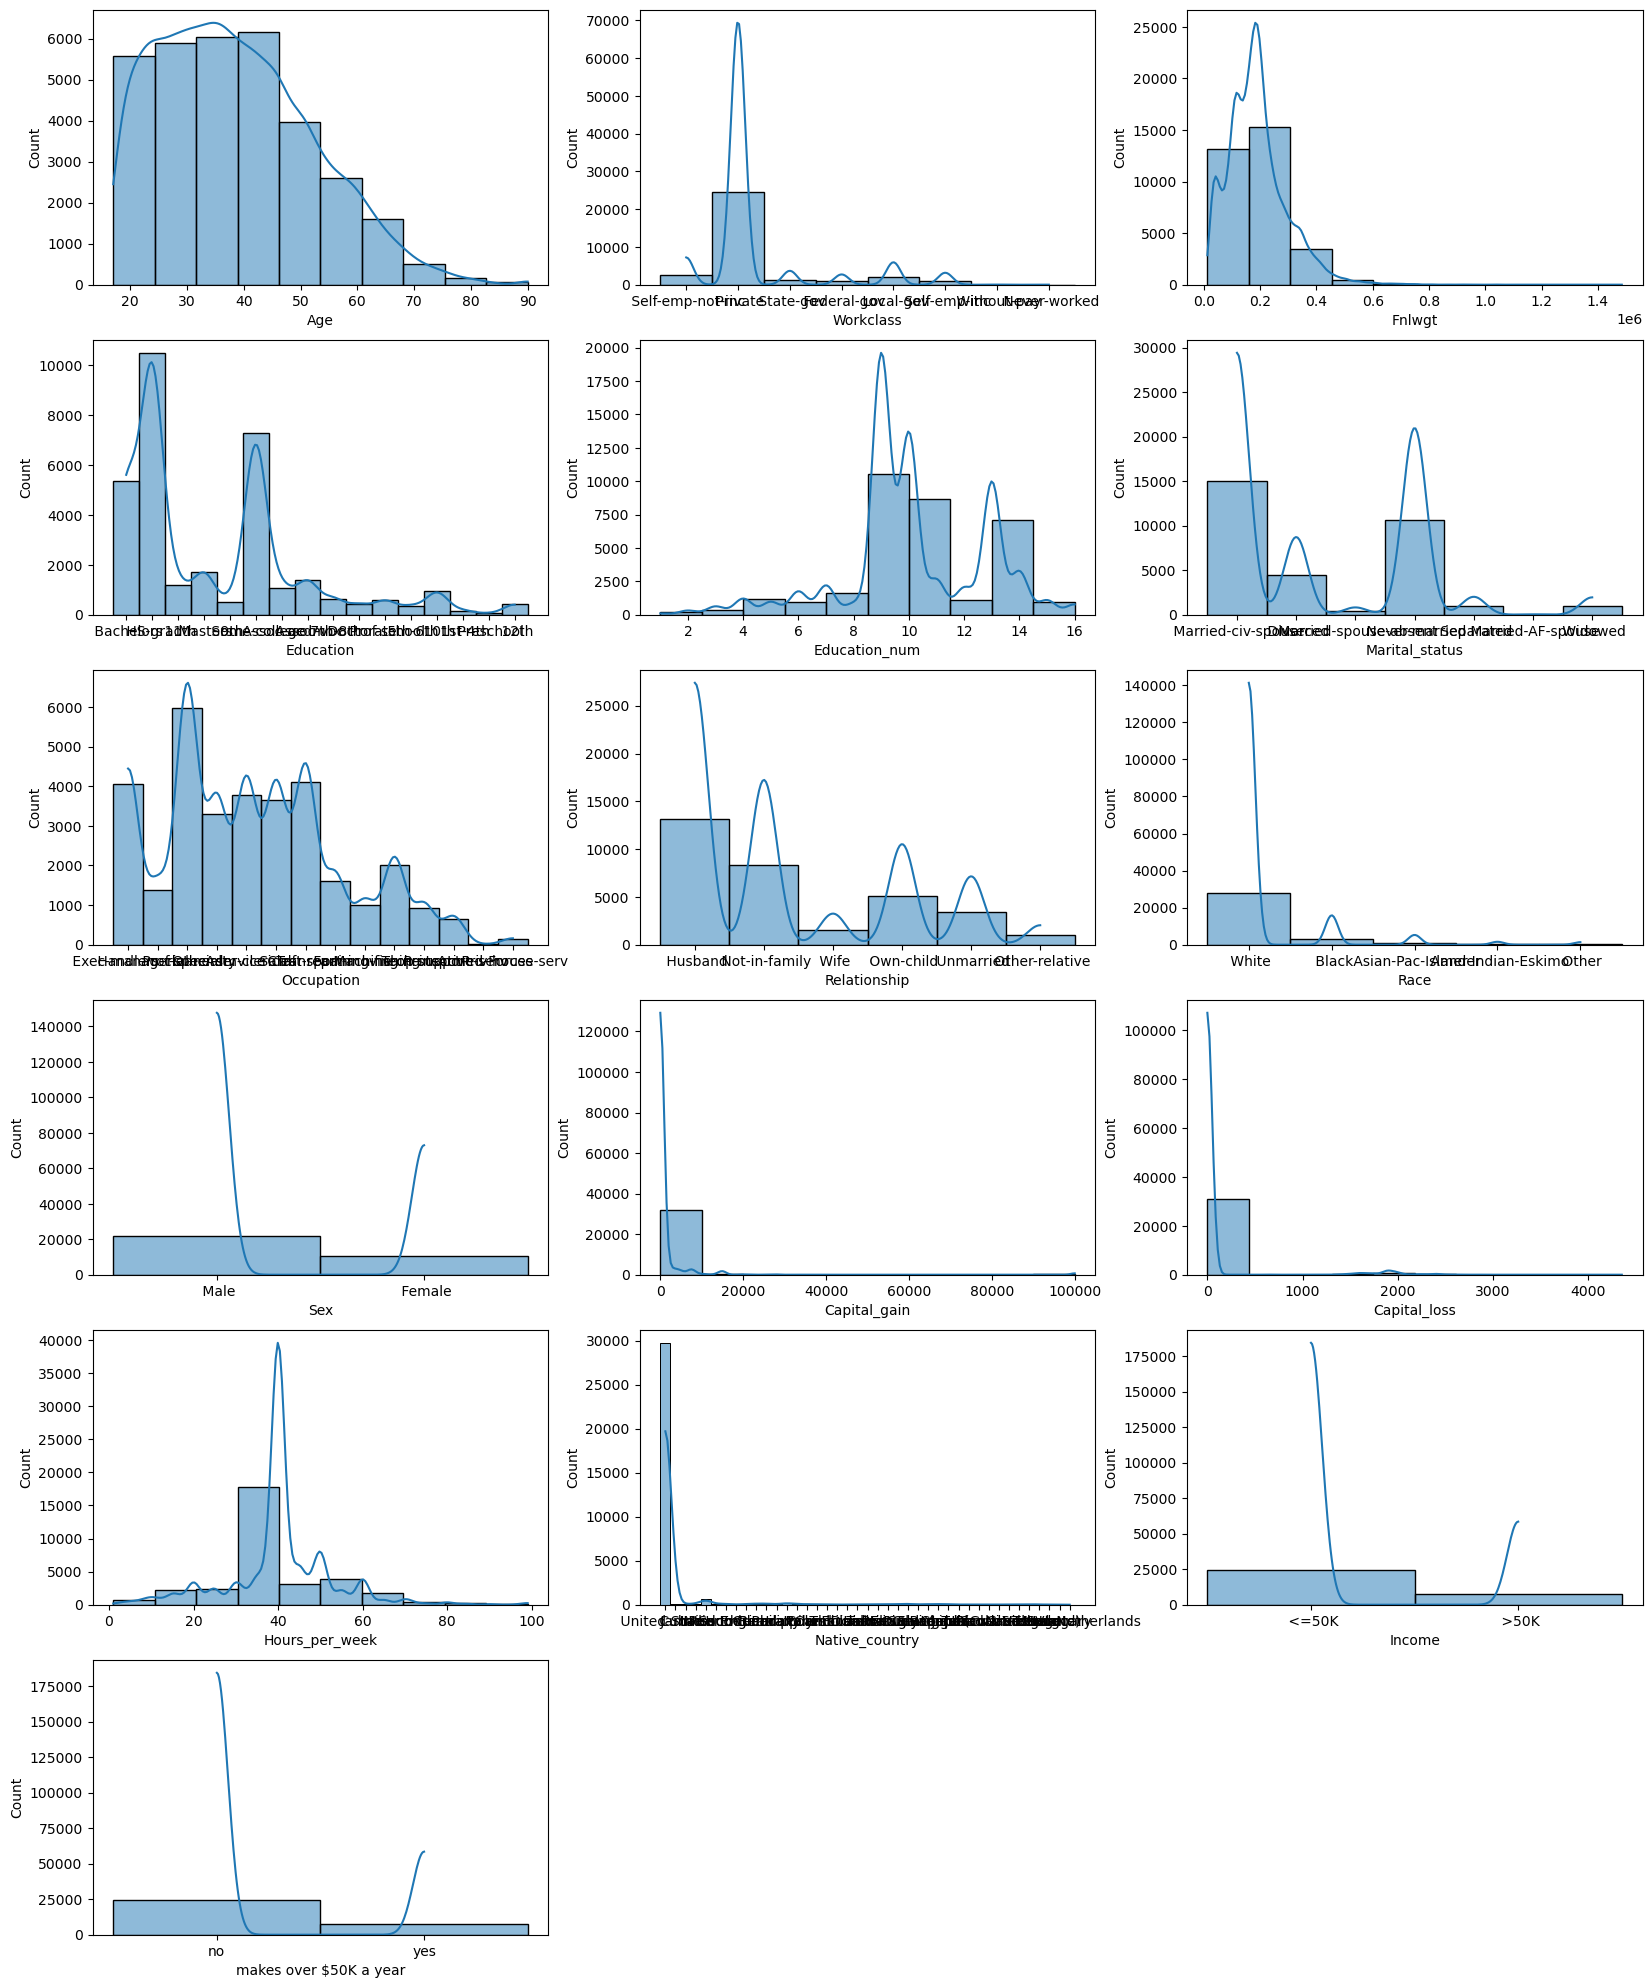

In [71]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=16:
        plt.subplot(6,3,p)
        sns.histplot(df[i], bins=10, kde=True, palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
    
plt.show()

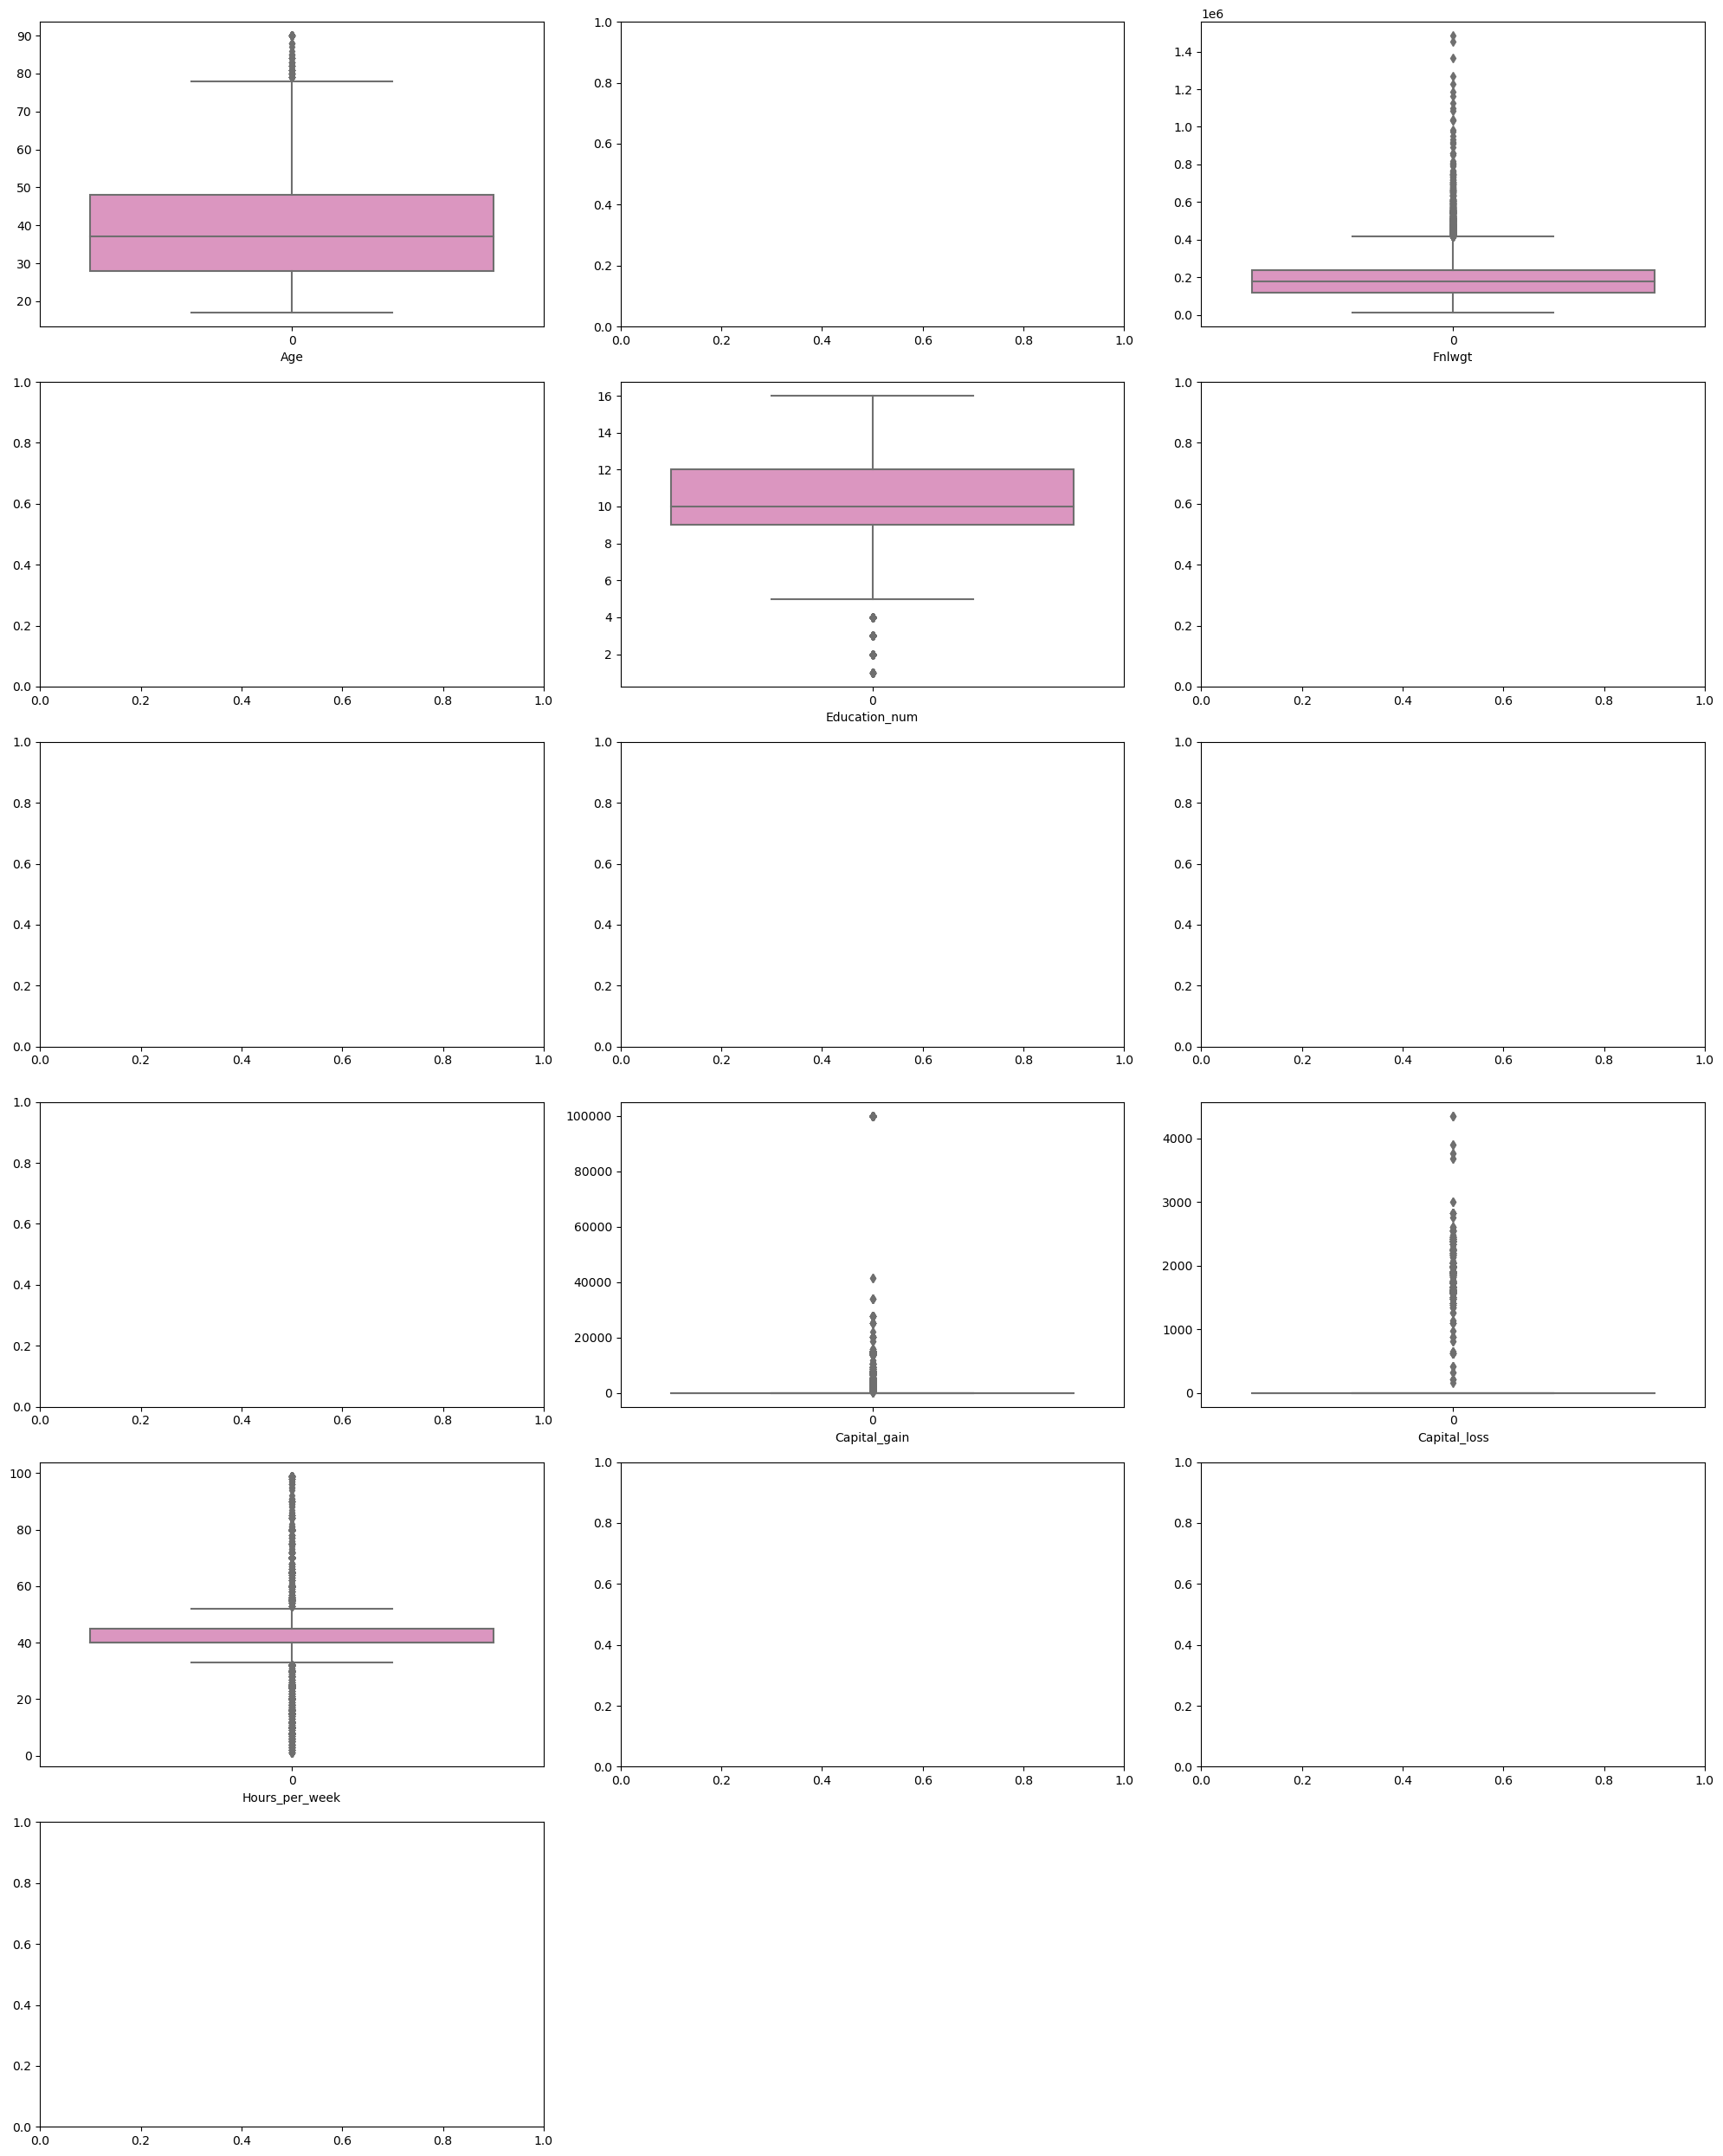

In [72]:
#Checking outliers using boxplot
plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:
    if p <= 16:
        plt.subplot(6, 3, p)

        if df[i].dtype in ['float64', 'int64']:
            sns.boxplot(df[i], palette='Set2_r')
            plt.xlabel(i)
    p += 1

plt.tight_layout()
plt.show()

There are definitely outliers, that can be seen thrugh the above graph, we can remove them using zscore method.

In [73]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,no
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,yes
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,no
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,no


In [74]:
from scipy.stats import zscore 
out_features = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features))
z[np.isnan(z)] = 0
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [75]:
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [76]:
df1 = df[(z<3).all(axis = 1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,no
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,yes
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,no
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,no


# Checking for skewness

In [77]:
df1.dtypes

Age                        int64
Workclass                 object
Fnlwgt                     int64
Education                 object
Education_num              int64
Marital_status            object
Occupation                object
Relationship              object
Race                      object
Sex                       object
Capital_gain               int64
Capital_loss               int64
Hours_per_week             int64
Native_country            object
Income                    object
makes over $50K a year    object
dtype: object

In [78]:
df1.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
dtype: float64

In [79]:
from scipy.stats import boxcox 

df1['Capital_gain'], _ = boxcox(df1['Capital_gain'] + 1)  
df1['Capital_loss'], _ = boxcox(df1['Capital_loss'] + 1)  

In [80]:
df1.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
dtype: float64

In [81]:
from scipy.stats import boxcox 

df1['Capital_gain'], _ = boxcox(df1['Capital_gain'] + 1)  
df1['Capital_loss'], _ = boxcox(df1['Capital_loss'] + 1)  

In [82]:
df1.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
dtype: float64

ENCODING ALL THE CATEGORICAL DATA

In [83]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
    
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
0,50,5.0,83311,8.0,13,2.0,3.0,0.0,4.0,1.0,0.000000,0.0,13,37.0,0.0,0.0
1,38,3.0,215646,10.0,9,0.0,5.0,1.0,4.0,1.0,0.000000,0.0,40,37.0,0.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0.000000,0.0,40,37.0,0.0,0.0
3,28,3.0,338409,8.0,13,2.0,9.0,5.0,2.0,0.0,0.000000,0.0,40,4.0,0.0,0.0
4,37,3.0,284582,11.0,14,2.0,3.0,5.0,4.0,0.0,0.000000,0.0,40,37.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,6.0,12,2.0,12.0,5.0,4.0,0.0,0.000000,0.0,38,37.0,0.0,0.0
32556,40,3.0,154374,10.0,9,2.0,6.0,0.0,4.0,1.0,0.000000,0.0,40,37.0,1.0,1.0
32557,58,3.0,151910,10.0,9,6.0,0.0,4.0,4.0,0.0,0.000000,0.0,40,37.0,0.0,0.0
32558,22,3.0,201490,10.0,9,4.0,0.0,3.0,4.0,1.0,0.000000,0.0,20,37.0,0.0,0.0


In [84]:
df1.dtypes

Age                         int64
Workclass                 float64
Fnlwgt                      int64
Education                 float64
Education_num               int64
Marital_status            float64
Occupation                float64
Relationship              float64
Race                      float64
Sex                       float64
Capital_gain              float64
Capital_loss              float64
Hours_per_week              int64
Native_country            float64
Income                    float64
makes over $50K a year    float64
dtype: object

# Checking correlation

In [85]:
cor = df1.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,makes over $50K a year
Age,1.000000,0.033011,-0.074427,-0.004827,0.041426,-0.285664,-0.002601,-0.266795,0.027973,0.086565,0.121431,0.019606,0.092195,-0.001635,0.239373,0.239302
Workclass,0.033011,1.000000,-0.023070,0.002705,-0.000664,-0.016131,0.008167,-0.057641,0.045449,0.068847,0.003630,-0.009957,0.027275,-0.001669,-0.007196,-0.007336
Fnlwgt,-0.074427,-0.023070,1.000000,-0.023258,-0.037439,0.029274,-0.002072,0.008238,-0.010477,0.028434,-0.005685,0.000636,-0.015376,-0.060748,-0.009076,-0.009097
Education,-0.004827,0.002705,-0.023258,1.000000,0.361143,-0.037297,-0.042788,-0.012823,0.015554,-0.027965,0.017703,-0.001088,0.060247,0.071737,0.074586,0.074570
Education_num,0.041426,-0.000664,-0.037439,0.361143,1.000000,-0.058990,0.069773,-0.096523,0.028547,0.009142,0.105270,0.008955,0.150517,0.058212,0.318600,0.318652
Marital_status,-0.285664,-0.016131,0.029274,-0.037297,-0.058990,1.000000,0.035527,0.184776,-0.066197,-0.123321,-0.063994,-0.017034,-0.195285,-0.016976,-0.194458,-0.194436
Occupation,-0.002601,0.008167,-0.002072,-0.042788,0.069773,0.035527,1.000000,-0.036641,-0.003297,0.049840,0.006396,-0.000278,-0.022763,-0.001645,0.030684,0.030749
Relationship,-0.266795,-0.057641,0.008238,-0.012823,-0.096523,0.184776,-0.036641,1.000000,-0.116297,-0.577083,-0.081185,0.036363,-0.257918,-0.011042,-0.245894,-0.245834
Race,0.027973,0.045449,-0.010477,0.015554,0.028547,-0.066197,-0.003297,-0.116297,1.000000,0.089770,0.024370,-0.000900,0.045336,0.117186,0.071742,0.071714
Sex,0.086565,0.068847,0.028434,-0.027965,0.009142,-0.123321,0.049840,-0.577083,0.089770,1.000000,0.064189,-0.033085,0.233912,0.002205,0.209938,0.209891


In [86]:
cor['makes over $50K a year'].sort_values(ascending = False)

makes over $50K a year    1.000000
Income                    0.999903
Education_num             0.318652
Capital_gain              0.261908
Age                       0.239302
Hours_per_week            0.230596
Sex                       0.209891
Education                 0.074570
Race                      0.071714
Occupation                0.030749
Native_country            0.016809
Workclass                -0.007336
Fnlwgt                   -0.009097
Capital_loss             -0.017493
Marital_status           -0.194436
Relationship             -0.245834
Name: makes over $50K a year, dtype: float64

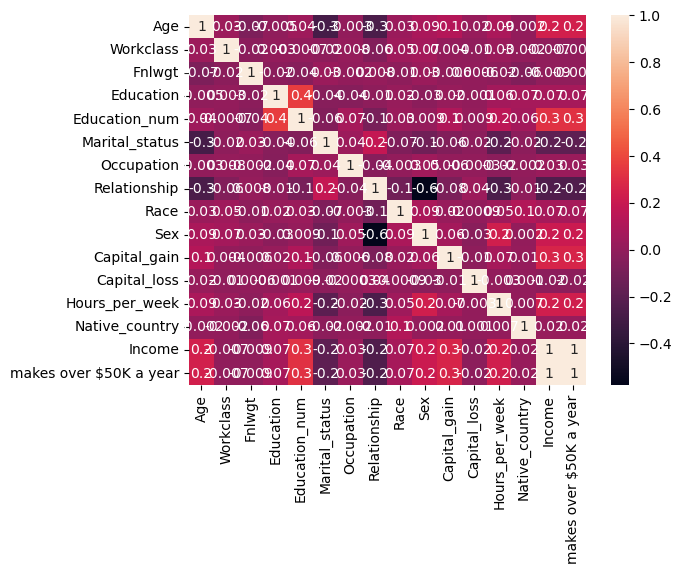

In [87]:
sns.heatmap(df1.corr(), annot = True, fmt = ".1g")
plt.show()

<Axes: >

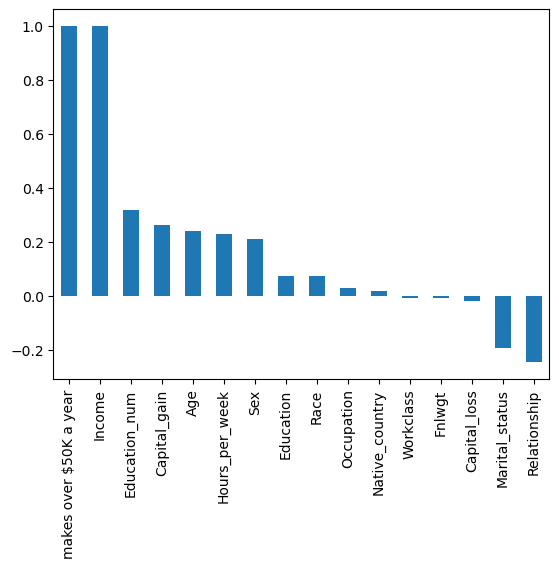

In [88]:
cor['makes over $50K a year'].sort_values(ascending = False).plot(kind='bar')

# Feature scaling and standardisation

In [89]:
x=df1.drop("makes over $50K a year", axis=1)
y=df1['makes over $50K a year']

In [90]:
x.shape

(29827, 15)

In [91]:
y.shape

(29827,)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.887615,1.733034,-1.077638,-0.340349,1.191339,-0.410521,-0.780317,-0.919032,0.393963,0.716230,-0.296683,-0.040148,-2.414481,0.257289,-0.535859
1,-0.010760,-0.078214,0.322068,0.249294,-0.439450,-1.731049,-0.278651,-0.297840,0.393963,0.716230,-0.296683,-0.040148,0.009327,0.257289,-0.535859
2,1.112209,-0.078214,0.523824,-2.404103,-1.254844,-0.410521,-0.278651,-0.919032,-1.957360,0.716230,-0.296683,-0.040148,0.009327,0.257289,-0.535859
3,-0.759406,-0.078214,1.620531,-0.340349,1.191339,-0.410521,0.724679,2.186928,-1.957360,-1.396199,-0.296683,-0.040148,0.009327,-5.414548,-0.535859
4,-0.085625,-0.078214,1.051204,0.544116,1.599037,-0.410521,-0.780317,2.186928,0.393963,-1.396199,-0.296683,-0.040148,0.009327,0.257289,-0.535859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,-0.834271,-0.078214,0.762663,-0.929993,0.783642,-0.410521,1.477177,2.186928,0.393963,-1.396199,-0.296683,-0.040148,-0.170214,0.257289,-0.535859
29823,0.138969,-0.078214,-0.326005,0.249294,-0.439450,-0.410521,-0.027819,-0.919032,0.393963,0.716230,-0.296683,-0.040148,0.009327,0.257289,1.866164
29824,1.486532,-0.078214,-0.352067,0.249294,-0.439450,2.230536,-1.532814,1.565736,0.393963,-1.396199,-0.296683,-0.040148,0.009327,0.257289,-0.535859
29825,-1.208594,-0.078214,0.172340,0.249294,-0.439450,0.910008,-1.532814,0.944544,0.393963,0.716230,-0.296683,-0.040148,-1.786086,0.257289,-0.535859


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.206780,Age
1,1.009136,Workclass
2,1.012697,Fnlwgt
3,1.163999,Education
4,1.308409,Education_num
5,1.146040,Marital_status
6,1.016441,Occupation
7,1.676740,Relationship
8,1.033831,Race
9,1.566765,Sex


In [94]:
y.value_counts()

0.0    23174
1.0     6653
Name: makes over $50K a year, dtype: int64

In [95]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [96]:
y1.value_counts()

0.0    23174
1.0    23174
Name: makes over $50K a year, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 1.0 at random state 1


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = rs) 


In [99]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

In [100]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

1.0
[[6988    0]
 [   0 6917]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



In [101]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

1.0
[[6988    0]
 [   0 6917]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



In [102]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

1.0
[[6988    0]
 [   0 6917]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



In [103]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.999928083423229
[[6988    0]
 [   1 6916]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



In [104]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.999928083423229
[[6988    0]
 [   1 6916]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



In [105]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.999928083423229
[[6988    0]
 [   1 6916]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



In [106]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.999928083423229
[[6988    0]
 [   1 6916]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6988
         1.0       1.00      1.00      1.00      6917

    accuracy                           1.00     13905
   macro avg       1.00      1.00      1.00     13905
weighted avg       1.00      1.00      1.00     13905



# cross val score

In [107]:
#Random forest 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predRFC)-score.mean())

[0.99989213 1.         1.         1.         1.        ]
0.9999784250269688
Difference is 2.1574973031235345e-05


In [108]:
#Extra Trees
score = cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predETC)-score.mean())

[0.99989213 1.         1.         1.         1.        ]
0.9999784250269688
Difference is 2.1574973031235345e-05


In [109]:
#Logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predLR)-score.mean())

[0.99989213 1.         1.         1.         1.        ]
0.9999784250269688
Difference is 2.1574973031235345e-05


In [110]:
#SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predsvc)-score.mean())

[0.99978425 1.         1.         1.         0.99989211]
0.9999352727532578
Difference is -7.189330028745111e-06


In [111]:
#Adaboost
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predABC)-score.mean())

[0.99989213 1.         0.99989213 0.99989211 1.        ]
0.9999352727532578
Difference is -7.189330028745111e-06


In [112]:
#Bagging
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predBC)-score.mean())

[0.99989213 1.         1.         1.         0.99989211]
0.999956847726289
Difference is -2.8764303059980456e-05


In [113]:
#Gradient boosting
score = cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predGBC)-score.mean())

[0.99989213 1.         1.         0.99989211 1.        ]
0.999956847726289
Difference is -2.8764303059980456e-05


Considering the cross val score and the model individual performance, selecting ETC as the best fitting model.

# Hyperparameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
              'random_state':[10,50,5000],
              'max_depth' : [0,10,30], 
              'n_jobs' : [-2,-1,1], 
              'n_estimators':[50,100,150,200,350]}

In [116]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5, n_jobs=-1)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 30],
                         'n_estimators': [50, 100, 150, 200, 350],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 5000]})

In [118]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [119]:
final_model = ExtraTreesClassifier(criterion='gini', max_depth = 10, n_estimators=50, n_jobs=-2, random_state=10)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(str(acc*100) + "%")

100.0%


# ROC curve

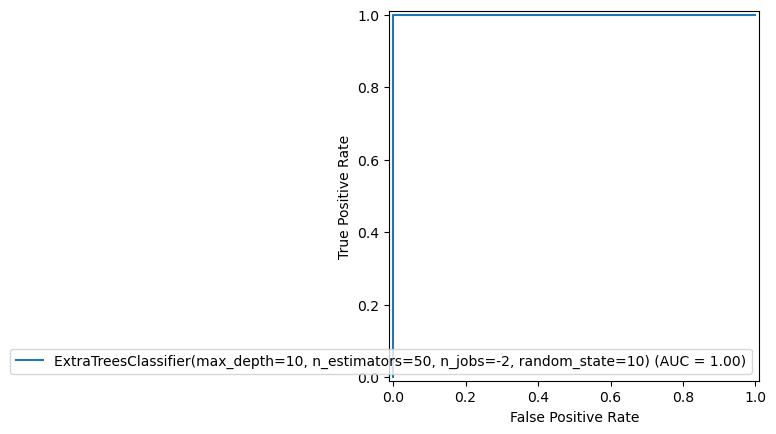

In [120]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=final_model)
display.plot()

The dataset includes various demographic and socio-economic features, such as age, education, occupation, and marital status, among others. These features can be used to build predictive models to determine whether an individual's income exceeds $50K a year, which has important implications for understanding income disparities and economic trends.